In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import datetime as dt
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.offsets import CDay
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.holiday import Holiday, USMemorialDay,USMartinLutherKingJr,USThanksgivingDay,USPresidentsDay,USLaborDay,USColumbusDay,\
     AbstractHolidayCalendar, nearest_workday, MO
from pandas.tseries.holiday import get_calendar, HolidayCalendarFactory
from datetime import datetime

C:\Users\lena\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
class ExampleCalendar(AbstractHolidayCalendar):
    rules = [
        USMemorialDay,
        USMartinLutherKingJr,
        USPresidentsDay,
        USLaborDay,
        USColumbusDay,
        USThanksgivingDay,
        Holiday('New Years Day', month=1, day=1, observance=nearest_workday),
        Holiday('July 4th', month=7, day=4, observance=nearest_workday),
        Holiday('Christmas', month=12, day=25, observance=nearest_workday),
        Holiday('Veterans Day', month=11, day=11, observance=nearest_workday),
    ]

In [4]:
dt = pd.read_csv('time_zone_2016_05.csv', sep = ',',header=0)

In [5]:
dt1231=dt[dt.index==1230]#номер региона 1231, квадрат с индексом 1230.

In [6]:
dt1231

,Unnamed: 0,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1230,1231,1143.0,1005.0,810.0,662.0,512.0,230.0,190.0,265.0,328.0,...,759.0,795.0,687.0,900.0,1321.0,1092.0,1170.0,1438.0,1365.0,925.0


In [7]:
dt1 = pd.read_csv('time_zone1231_2014_05.csv', sep = ',',header=0)

In [8]:
dt2=pd.read_csv('time_zone1231_2014_06.csv', sep = ',',header=0)
dt3=pd.read_csv('time_zone1231_2014_07.csv', sep = ',',header=0)
dt4=pd.read_csv('time_zone1231_2014_08.csv', sep = ',',header=0)
dt5=pd.read_csv('time_zone1231_2014_09.csv', sep = ',',header=0)
dt6=pd.read_csv('time_zone1231_2014_10.csv', sep = ',',header=0)
dt7=pd.read_csv('time_zone1231_2014_11.csv', sep = ',',header=0)
dt8=pd.read_csv('time_zone1231_2014_12.csv', sep = ',',header=0)
dt9=pd.read_csv('time_zone1231_2015_01.csv', sep = ',',header=0)
dt10=pd.read_csv('time_zone1231_2015_02.csv', sep = ',',header=0)
dt11=pd.read_csv('time_zone1231_2015_03.csv', sep = ',',header=0)
dt12=pd.read_csv('time_zone1231_2015_04.csv', sep = ',',header=0)
dt13=pd.read_csv('time_zone1231_2015_05.csv', sep = ',',header=0)
dt14=pd.read_csv('time_zone1231_2015_06.csv', sep = ',',header=0)
dt15=pd.read_csv('time_zone1231_2015_07.csv', sep = ',',header=0)
dt16=pd.read_csv('time_zone1231_2015_08.csv', sep = ',',header=0)
dt17=pd.read_csv('time_zone1231_2015_09.csv', sep = ',',header=0)
dt18=pd.read_csv('time_zone1231_2015_10.csv', sep = ',',header=0)
dt19=pd.read_csv('time_zone1231_2015_11.csv', sep = ',',header=0)
dt20=pd.read_csv('time_zone1231_2015_12.csv', sep = ',',header=0)
dt21=pd.read_csv('time_zone1231_2016_01.csv', sep = ',',header=0)
dt22=pd.read_csv('time_zone1231_2016_02.csv', sep = ',',header=0)
dt23=pd.read_csv('time_zone1231_2016_03.csv', sep = ',',header=0)
dt24=pd.read_csv('time_zone1231_2016_04.csv', sep = ',',header=0)
dt25=pd.read_csv('time_zone1231_2016_05.csv', sep = ',',header=0)

In [9]:
x= dt1.T[1:]
y=dt2.T[1:]
z1=dt3.T[1:]
z2=dt4.T[1:]
z3=dt5.T[1:]
z4=dt6.T[1:]
z5=dt7.T[1:]
z6=dt8.T[1:]
z7=dt9.T[1:]
z8=dt10.T[1:]
z9=dt11.T[1:]
z10=dt12.T[1:]
z11=dt13.T[1:]
z12=dt14.T[1:]
z13=dt15.T[1:]
z14=dt16.T[1:]
z15=dt17.T[1:]
z16=dt18.T[1:]
z17=dt19.T[1:]
z18=dt20.T[1:]
z19=dt21.T[1:]
z20=dt22.T[1:]
z21=dt23.T[1:]
z22=dt24.T[1:]
z23=dt25.T[1:] 
frames = [x,y,z1,z2, z3, z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23]

In [10]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


C:\Users\lena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['MO', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
import statsmodels as sm

In [12]:
result = pd.concat(frames)

In [13]:
result.tail()

,0
2016-05-31 19:00:00,1092.0
2016-05-31 20:00:00,1170.0
2016-05-31 21:00:00,1438.0
2016-05-31 22:00:00,1365.0
2016-05-31 23:00:00,925.0


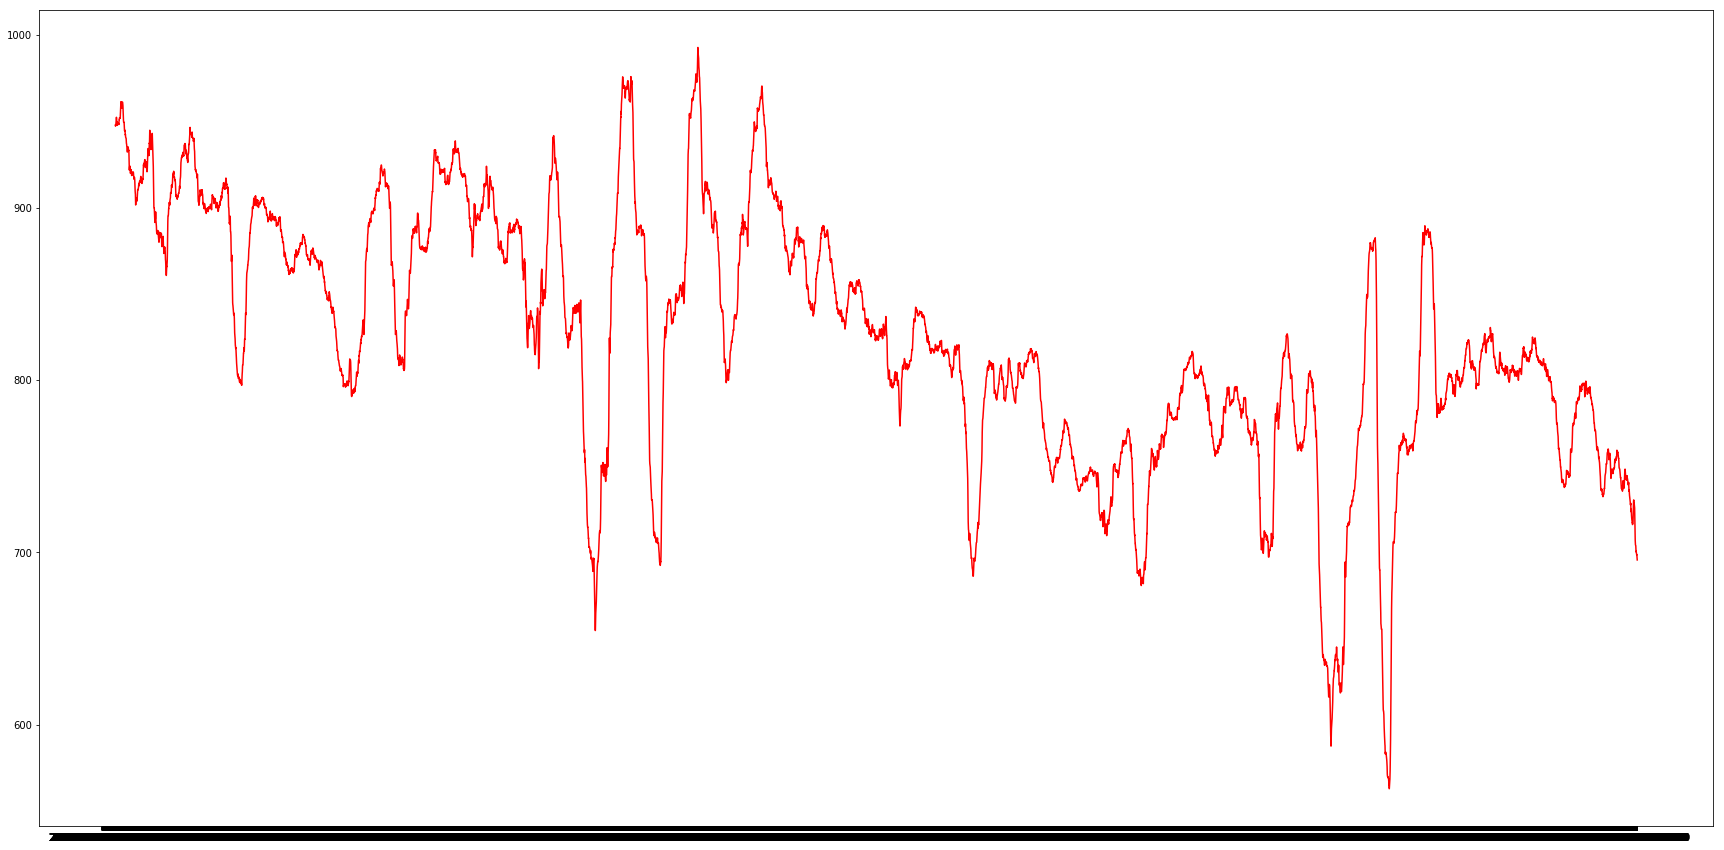

In [15]:
plt.figure(figsize=(30,15))
gr=result.rolling(168).mean()
plt.plot(gr.index, gr, 'r')

In [14]:
result.index = result.index.to_datetime()
result['hour'] = result.index.hour
result['weekday'] = result.index.weekday
result['is_weekend'] = result.weekday.isin([5,6])*1
result['month'] = result.index.month
result['year']=result.index.year
result['day']=result.index.day
result.head()

C:\Users\lena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


,0,hour,weekday,is_weekend,month,year,day
2014-05-01 00:00:00,1147.0,0,3,0,5,2014,1
2014-05-01 01:00:00,576.0,1,3,0,5,2014,1
2014-05-01 02:00:00,327.0,2,3,0,5,2014,1
2014-05-01 03:00:00,220.0,3,3,0,5,2014,1
2014-05-01 04:00:00,235.0,4,3,0,5,2014,1


In [15]:
result.columns=['n','hour','weekday','weekends','month','year','day']

In [16]:
num_ned=np.array([range(1,110)]*168)
num_ned2=np.reshape(num_ned, 18312,'F')
num_ned3=num_ned2[0:18288]
result['num_ned']=num_ned3

In [17]:
l=range(1,18289)
result['t']=l

линейное уравнение недельного тренда выглядит следующий образом: y=1.89477*x+927

In [18]:
result['cos7']=cos(2*3.14159265358979*2*result['t']/168*52*5)

In [19]:
result['cos1']=cos(3*3.14159265358979*2*result['t']/168*52-0.85)

In [20]:
result['sin1']=sin(3*3.14159265358979*2*result['t']/168*52-0.85)

In [21]:
result['sin_season']=sin(5*3.14159265358979*2*result['t']/168*14)

In [22]:
result['cos_month']=cos(5*3.14159265358979*2*result['t']/168*3)

In [23]:
result['sin_month']=cos(5*3.14159265358979*2*result['t']/168*3)

In [24]:
result['sin_week']=cos(7*3.14159265358979*2*result['t']/24-24)

In [25]:
result['sin_day']=sin(7*3.14159265358979*2*result['t']/7)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [26]:
r=pd.DataFrame(result)

In [27]:
print(r.columns.values)

['n' 'hour' 'weekday' 'weekends' 'month' 'year' 'day' 'num_ned' 't' 'cos7'
 'cos1' 'sin1' 'sin_season' 'cos_month' 'sin_month' 'sin_week' 'sin_day']


In [28]:
cal = ExampleCalendar()

In [32]:
celeb=cal.holidays(datetime(2014, 5, 1), datetime(2016, 5, 31))

In [33]:
celeb#список праздничных дней для нашего периода

DatetimeIndex(['2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13',
               '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03',
               '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26',
               '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15',
               '2016-05-30'],
              dtype='datetime64[ns]', freq=None)

In [34]:
from datetime import datetime, timedelta
c=[]
for i in range(0,24):
    c.append(pd.DatetimeIndex(celeb) + timedelta(hours=i,minutes=0))#создаем все возможные значения часов для праздничных дней

In [35]:
24*21

504

In [36]:
c=np.reshape(c,504)

In [37]:
c1=pd.to_datetime(c)

In [38]:
c1

DatetimeIndex(['2014-05-26 00:00:00', '2014-07-04 00:00:00',
               '2014-09-01 00:00:00', '2014-10-13 00:00:00',
               '2014-11-11 00:00:00', '2014-11-27 00:00:00',
               '2014-12-25 00:00:00', '2015-01-01 00:00:00',
               '2015-01-19 00:00:00', '2015-02-16 00:00:00',
               ...
               '2015-07-03 23:00:00', '2015-09-07 23:00:00',
               '2015-10-12 23:00:00', '2015-11-11 23:00:00',
               '2015-11-26 23:00:00', '2015-12-25 23:00:00',
               '2016-01-01 23:00:00', '2016-01-18 23:00:00',
               '2016-02-15 23:00:00', '2016-05-30 23:00:00'],
              dtype='datetime64[ns]', length=504, freq=None)

In [39]:
c1=pd.to_datetime(c1)

In [40]:
r['Holiday'] = r.index.isin(c1).astype(int)#добавляем признак государственных праздников в таблицу с названием колонки Holydays

In [41]:
r.columns.values

array(['n', 'hour', 'weekday', 'weekends', 'month', 'year', 'day',
       'num_ned', 't', 'cos7', 'cos1', 'sin1', 'sin_season', 'cos_month',
       'sin_month', 'sin_week', 'sin_day', 'Holiday'], dtype=object)

In [42]:
m2 = smf.ols('n ~ hour+weekday+weekends+month+year+num_ned+sin_season+cos7+cos1+sin1+cos_month+sin_month+sin_week+Holiday', data=r)
fitted2 = m2.fit(cov_type='HC1')

In [43]:
print fitted2.summary()

                            OLS Regression Results                            
Dep. Variable:                      n   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1360.
Date:                Fri, 19 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:38:46   Log-Likelihood:            -1.2859e+05
No. Observations:               18288   AIC:                         2.572e+05
Df Residuals:                   18274   BIC:                         2.573e+05
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -8.46e+05   1.66e+05     -5.084      0.0

In [44]:
from pandas.tseries.offsets import *
pre_celeb=celeb-DateOffset(days=1)#предпраздничный 1 день
after_celeb=celeb+Day(1)#1 день после праздников

In [45]:
from datetime import datetime, timedelta
c_pred=[]
c_after=[]
for i in range(0,24):
    c_pred.append(pd.DatetimeIndex(pre_celeb) - timedelta(hours=i,minutes=0))#создаем все возможные значения часов для пред-пост-праздничных дней
    c_after.append(pd.DatetimeIndex(after_celeb) + timedelta(hours=i,minutes=0))
c_pred=np.reshape(c_pred,504)
c_after=np.reshape(c_after,504)
c_pred=pd.to_datetime(c_pred)
c_after=pd.to_datetime(c_after)

In [46]:
r['preHoliday'] = r.index.isin(c_pred).astype(int)
r['postHoliday'] = r.index.isin(c_after).astype(int)

In [47]:
m4 = smf.ols('n ~ hour+weekday*postHoliday+weekends+month+year+num_ned+sin_season+cos7+cos1+sin1+cos_month+sin_month+sin_week+Holiday+postHoliday', data=r)
fitted4 = m4.fit(cov_type='HC1')

In [48]:
print fitted4.summary()

                            OLS Regression Results                            
Dep. Variable:                      n   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1198.
Date:                Fri, 19 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:39:01   Log-Likelihood:            -1.2857e+05
No. Observations:               18288   AIC:                         2.572e+05
Df Residuals:                   18272   BIC:                         2.573e+05
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.624e+05   1

In [49]:
mov_av=[]
for i in range(0,18288,168):
    mov_av.append([r.n[i:i+168].sum()/168]*168)#Добавляем скользящюю среднюю

In [50]:
len(mov_av)*168

18312

In [51]:
l=np.reshape(mov_av,18312)

In [52]:
np.ndim(l)

1

In [53]:
len(l[0:18288])

18288

In [54]:
r['mov_al']=l[0:18288]

In [55]:
r['av_tem']=0

In [56]:
r.av_tem.loc[r['month']==1]=0#средняя температура воздуха 
r.av_tem.loc[r['month']==2]=1
r.av_tem.loc[r['month']==3]=5
r.av_tem.loc[r['month']==4]=11
r.av_tem.loc[r['month']==5]=16
r.av_tem.loc[r['month']==6]=21
r.av_tem.loc[r['month']==7]=24.5
r.av_tem.loc[r['month']==8]=24
r.av_tem.loc[r['month']==9]=20
r.av_tem.loc[r['month']==10]=13
r.av_tem.loc[r['month']==11]=8
r.av_tem.loc[r['month']==12]=3

C:\Users\lena\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
r.columns.values

array(['n', 'hour', 'weekday', 'weekends', 'month', 'year', 'day',
       'num_ned', 't', 'cos7', 'cos1', 'sin1', 'sin_season', 'cos_month',
       'sin_month', 'sin_week', 'sin_day', 'Holiday', 'preHoliday',
       'postHoliday', 'mov_al', 'av_tem'], dtype=object)

In [58]:
m6 = smf.ols('n  ~ hour+weekday*postHoliday+weekends+month+year+num_ned+sin_season+cos7+cos1+sin1+cos_month+sin_month+sin_week+Holiday+postHoliday+av_tem', data=r)
fitted6 = m6.fit(cov_type='HC1')

In [59]:
print fitted6.summary()

                            OLS Regression Results                            
Dep. Variable:                      n   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1129.
Date:                Fri, 19 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:39:22   Log-Likelihood:            -1.2856e+05
No. Observations:               18288   AIC:                         2.572e+05
Df Residuals:                   18271   BIC:                         2.573e+05
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.751e+05   1

In [60]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC6FDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000027355F60>]], dtype=object)

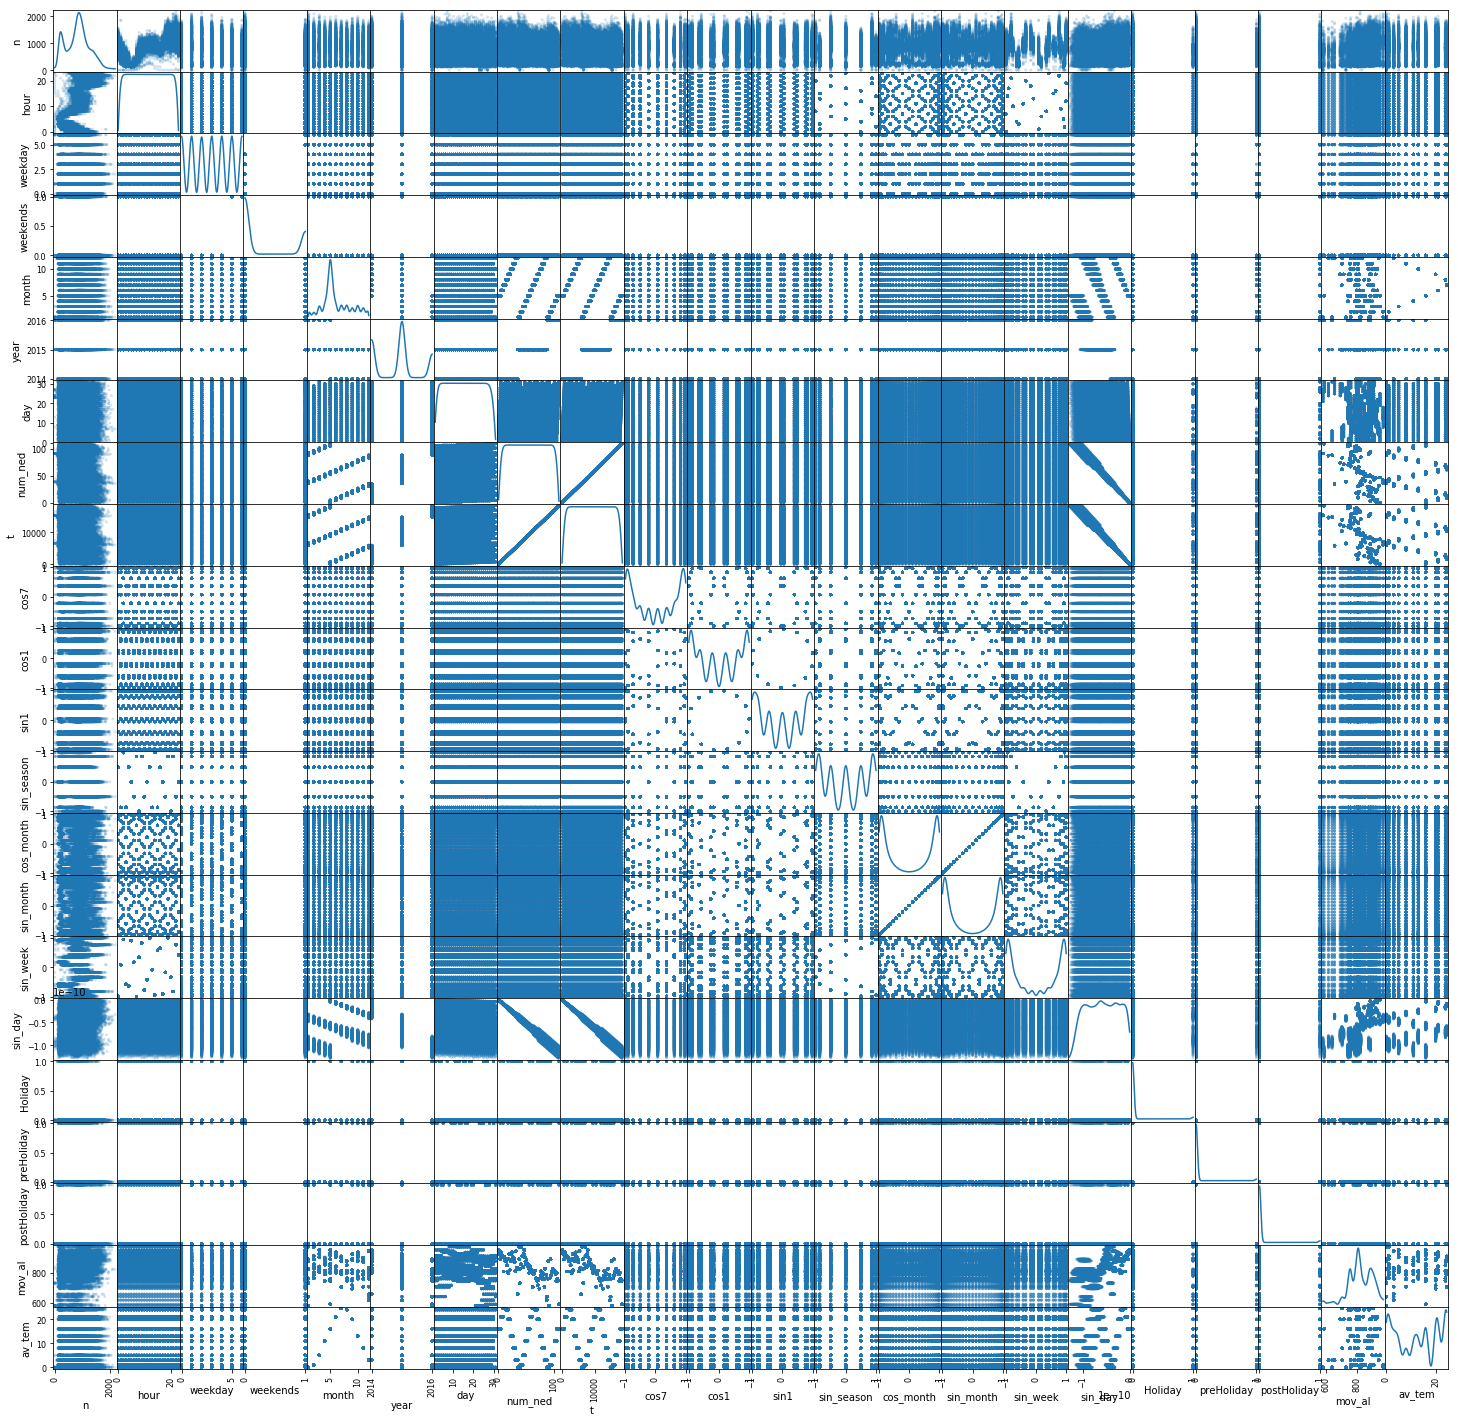

In [61]:
scatter_matrix(r, alpha=0.2, figsize=(25, 25), diagonal='kde')

In [62]:
fitted6.params

Intercept             -875143.878205
hour                       41.327321
weekday                     9.897706
postHoliday                52.942510
weekday:postHoliday       -34.429421
weekends                  -74.489217
month                      31.971533
year                      434.692580
num_ned                   -10.066364
sin_season                 15.003638
cos7                       19.909238
cos1                      -38.000583
sin1                       -7.094967
cos_month                 -12.518251
sin_month                 -12.518251
sin_week                  -41.618348
Holiday                  -166.162734
av_tem                     -1.374389
dtype: float64

In [63]:
r['trend']=-1.86*r['t']+927

In [66]:
m7 = smf.ols('n  ~ hour+weekday*postHoliday+weekends+month+year+trend+sin_season+cos7+cos1+sin1+cos_month+sin_month+sin_week+Holiday+av_tem-1', data=r)
fitted7 = m7.fit(cov_type='HC1')

In [67]:
fitted7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.392e+04
Date:                Fri, 19 Jan 2018   Prob (F-statistic):               0.00
Time:                        23:46:03   Log-Likelihood:            -1.2857e+05
No. Observations:               18288   AIC:                         2.572e+05
Df Residuals:                   18272   BIC:                         2.573e+05
Df Model:                          16                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
hour                   41.3377      0.354    116.881      0.000      40.645      42.031
weekday                 8.4013      1.555      5.402      0.000       5.353      11.450
postHoliday            50.5038     20.763      2.432      0.015       9.810      91.198
weekday:postHoliday   -33.5784      6.382     -5.262      0.000     -46.086     -21.071
weekends              -70.7529      7.330     -9.652      0.000     -85.120     -56.386
month                  -4.2864      0.652     -6.574      0.000      -5.564      -3.009
year                    0.2398      0.004     53.890      0.000       0.231       0.249
trend                   0.0056      0.000     25.616      0.000       0.005       0.006
sin_season             15.0036      2.618      5.732      0.000       9.873      20.134
cos7                   20.0335      2.896      6.917      0.000      14.357      25.710
cos1                  -37.7975      2.900    -13.033      0.000     -43.482     -32.113
sin1                   -6.8865      2.843     -2.422      0.015     -12.459      -1.314
cos_month             -12.4942      1.450     -8.619      0.000     -15.336      -9.653
sin_month             -12.4942      1.450     -8.619      0.000     -15.336      -9.653
sin_week              -41.6183      2.946    -14.126      0.000     -47.393     -35.844
Holiday              -167.0155     12.172    -13.721      0.000    -190.873    -143.158
av_tem                 -1.3524      0.266     -5.081      0.000      -1.874      -0.831
==============================================================================
Omnibus:                      682.777   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.798
Skew:                           0.421   Prob(JB):                    6.57e-186
Kurtosis:                       3.641   Cond. No.                     5.55e+20
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The smallest eigenvalue is 2.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
fitted7.predict()

array([  510.61626665,   504.95000881,   554.84928965, ...,  1199.67481088,
        1160.31174725,  1229.56743945])

C:\Users\lena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


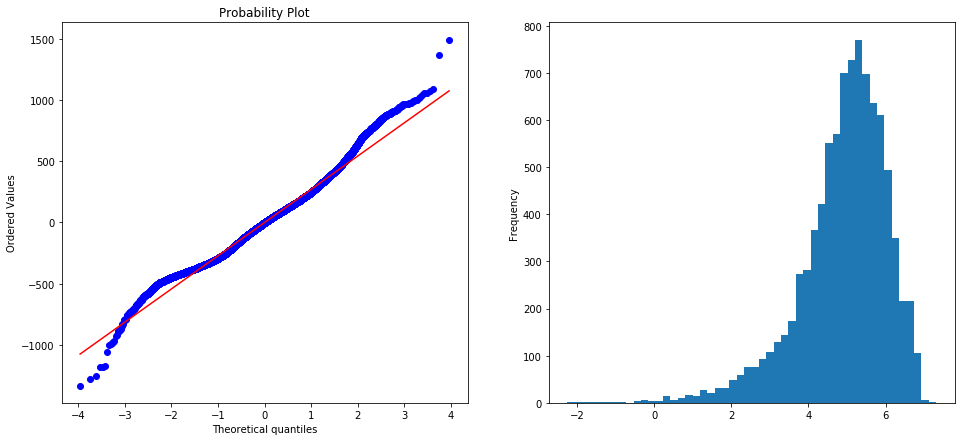

In [69]:
import scipy as sc
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted7.resid,dist='norm',plot=pylab)
plt.subplot(122)
np.log(fitted7.resid).plot.hist(bins=50)
pylab.show()

In [70]:
resid=fitted7.resid.values

In [71]:
len(fitted7.resid.values)

18288

In [72]:
fitted7.resid.values

array([ 636.38373335,   71.04999119, -227.84928965, ...,  238.32518912,
        204.68825275, -304.56743945])

In [73]:
r['resid'] = r['n']-fitted7.fittedvalues

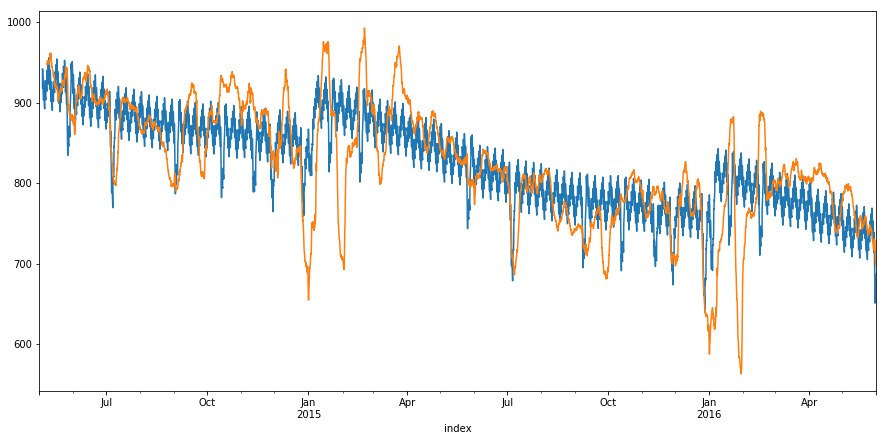

In [523]:
mod7_mean=fitted7.fittedvalues.rolling(70).mean()
mod7_mean.plot()
dat=r.n.rolling(168).mean()
dat.plot()

In [74]:
r['resid_diff'] = r.resid - r.resid.shift(168)

In [81]:
r.reset_index(inplace=True)
r['index'] = pd.to_datetime(r['index'])
r = r.set_index('index')

In [82]:
r.resid_diff[168:].values

array([-102.24627928,   95.75372072,   50.75372072, ...,   27.82829684,
       -106.17170316, -212.17170316])

In [84]:
import statsmodels.api as sm
s=sm.tsa.seasonal_decompose(r.resid_diff[168:],freq=12)

In [87]:
sm.tsa.stattools.adfuller(r.resid_diff[168:])

(-13.392545027506907,
 4.7361121869456651e-25,
 41L,
 18078L,
 {'1%': -3.430711778336927,
  '10%': -2.5668551065041614,
  '5%': -2.8616998923735948},
 219573.37198531089)

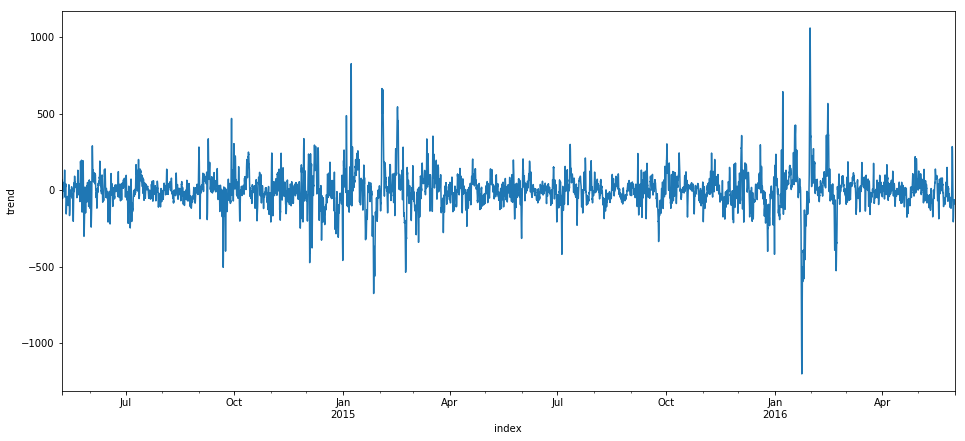

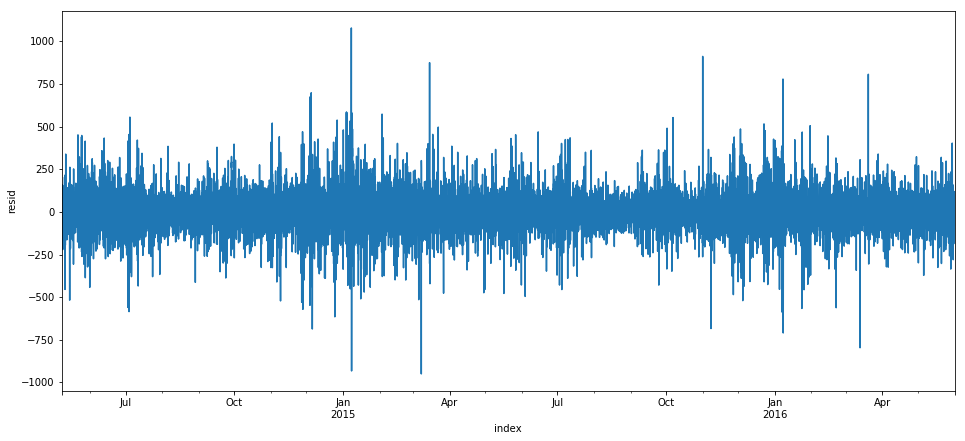

In [88]:
s.trend.plot()
plt.ylabel('trend')
plt.show()
s.resid.plot()
plt.ylabel('resid')
plt.show()

Проведем сезонное дифференцирование (сезоннность годовая)

Построим графики ACF и PACF итогового ряда

In [89]:
%matplotlib inline

In [90]:
import statsmodels.api as sm

In [91]:
r.columns

Index([u'n', u'hour', u'weekday', u'weekends', u'month', u'year', u'day',
       u'num_ned', u't', u'cos7', u'cos1', u'sin1', u'sin_season',
       u'cos_month', u'sin_month', u'sin_week', u'sin_day', u'Holiday',
       u'preHoliday', u'postHoliday', u'mov_al', u'av_tem', u'trend', u'resid',
       u'resid_diff'],
      dtype='object')

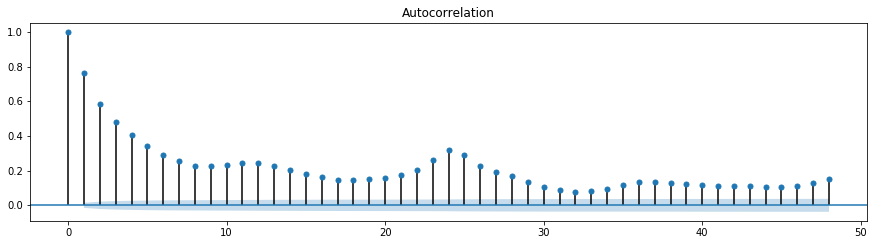

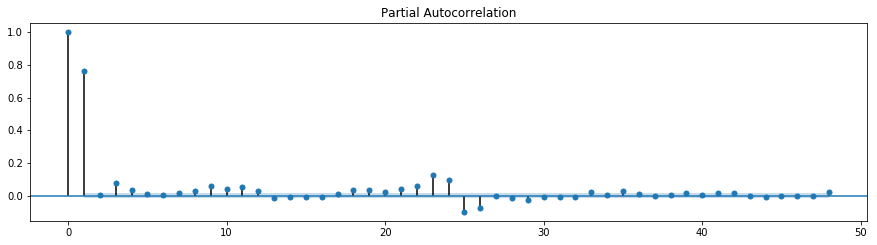

In [92]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(r.resid_diff[168:].squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(r.resid_diff[168:].squeeze(), lags=48, ax=ax)
pylab.show()

In [93]:
r['resid_diff2']=r['resid_diff']-r['resid_diff'].shift(168)

In [94]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

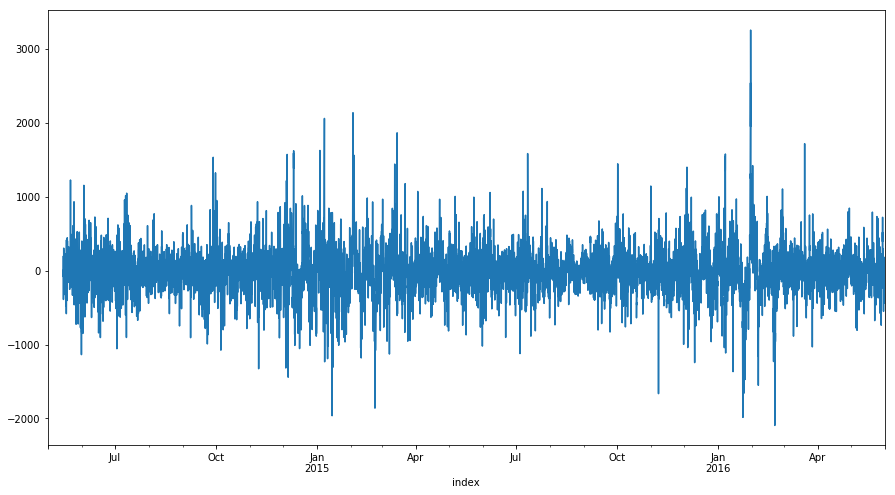

In [95]:
r.resid_diff2.plot()

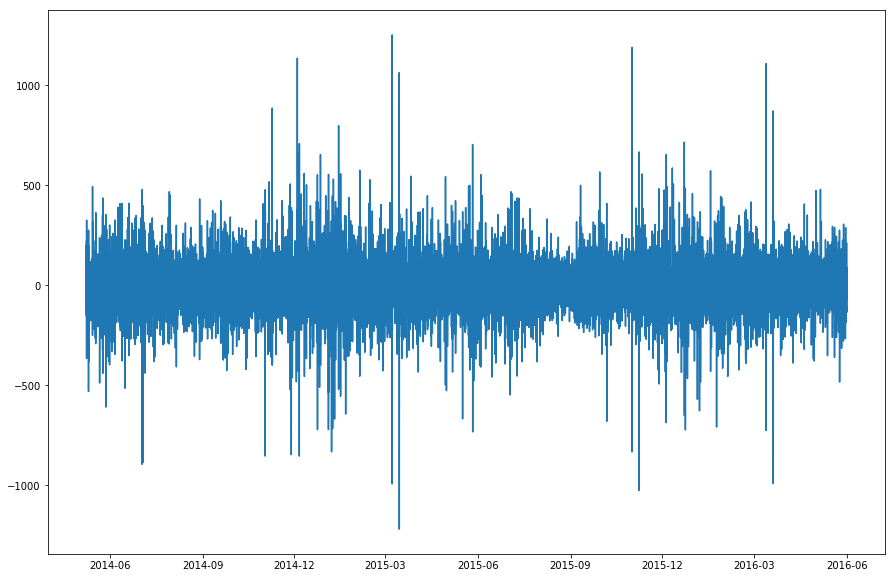

In [388]:
r['resid_last_diff'] = r.resid_diff - r.resid_diff.shift(1)
plot(r['resid_last_diff'][24*7+1:])

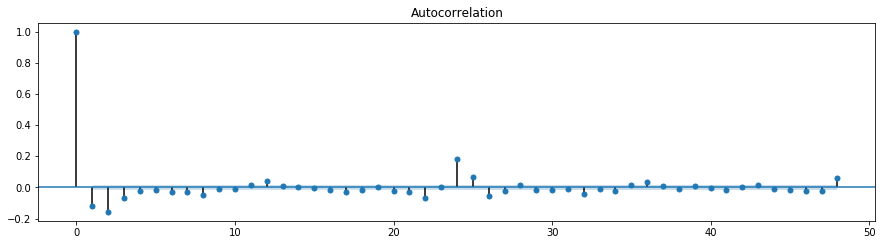

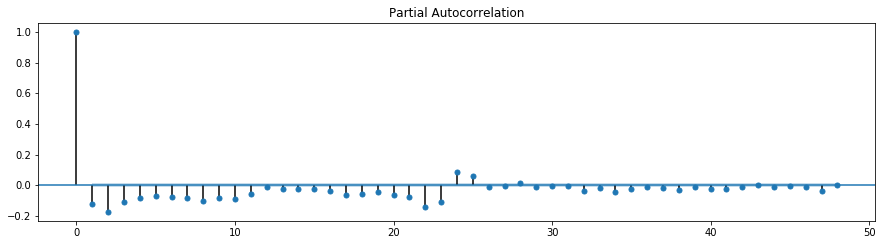

In [389]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(r.resid_last_diff[168+1:].squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(r.resid_last_diff[168+1:].squeeze(), lags=48, ax=ax)
pylab.show()

In [452]:
Q=1
q=5
P=1
p=3

In [453]:
ps = range(0, 4)
d = 1
qs = range(0,6)
P = 1
D = 1
Q = 1

In [454]:
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

24

In [393]:
r.columns

Index([u'n', u'hour', u'weekday', u'weekends', u'month', u'year', u'day',
       u'num_ned', u't', u'cos7', u'cos1', u'sin1', u'sin_season',
       u'cos_month', u'sin_month', u'sin_week', u'sin_day', u'Holiday',
       u'preHoliday', u'postHoliday', u'mov_al', u'av_tem', u'trend', u'resid',
       u'resid_diff', u'resid_diff2', u'resid_last_diff', u'model',
       u'arima_model'],
      dtype='object')

In [450]:
exoog=r[['hour', 'weekday', 'weekends', 'month', 'year', 'day',
       'num_ned','cos_month', 'sin_month', 'Holiday','sin_day','av_tem']]

In [457]:
%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(r.n[17288:],exog=exoog[17288:], order=(param[0], d, param[1]), 
                                        seasonal_order=(P, D, Q, 1)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 0 ns
('wrong parameters:', (1, 5))
('wrong parameters:', (2, 5))
('wrong parameters:', (3, 3))
('wrong parameters:', (3, 4))
('wrong parameters:', (3, 5))


In [458]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

   parameters           aic
6      (1, 0)  13175.716605
1      (0, 1)  13180.185200
0      (0, 0)  13183.269831
11     (2, 0)  13186.826752
7      (1, 1)  13187.272016


In [459]:
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 n   No. Observations:                 1000
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 1)   Log Likelihood               -6571.858
Date:                           Sun, 21 Jan 2018   AIC                          13175.717
Time:                                   21:03:30   BIC                          13254.241
Sample:                               04-20-2016   HQIC                         13205.561
                                    - 05-31-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hour        -191.7179      1.330   -144.157      0.000    -194.324    -189.111
weekday      -26.4525     23.671     -1.117

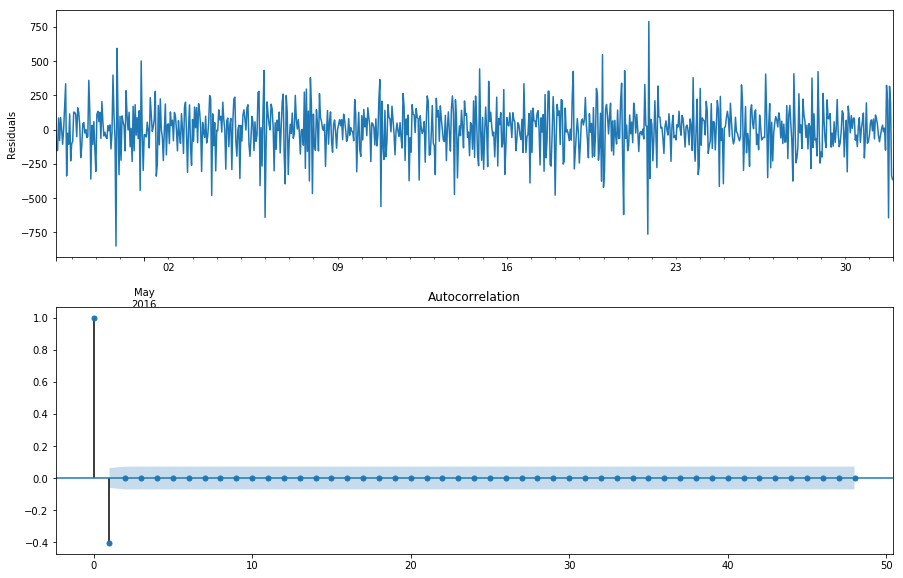

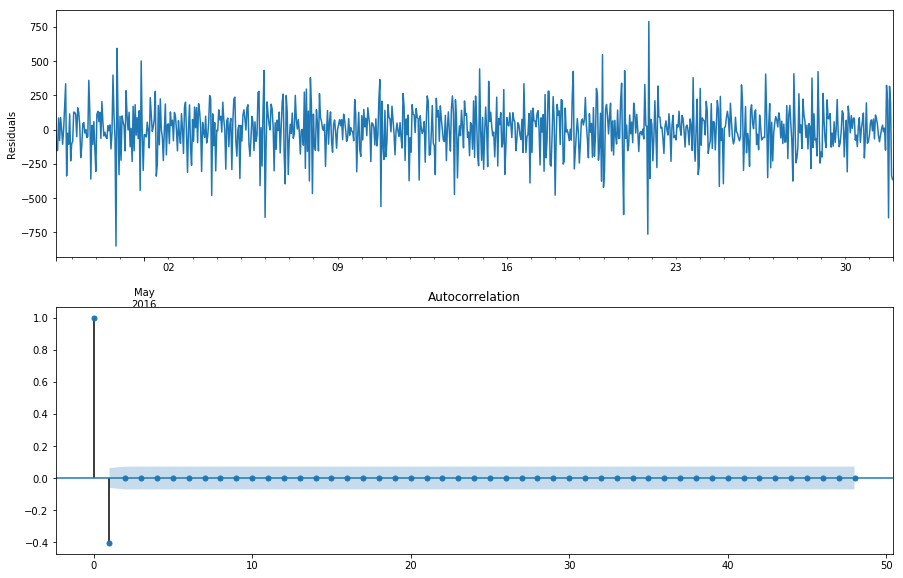

In [460]:
plt.figure(figsize(15,10))
plt.subplot(211)
best_model.resid[168:].plot()
plt.ylabel('Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze(), lags=48, ax=ax)

In [446]:
print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[168:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[168:])[1])

Критерий Стьюдента: p=0.891024
Критерий Дики-Фуллера: p=0.000000


In [344]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [461]:
r["arima_model"] = best_model.fittedvalues

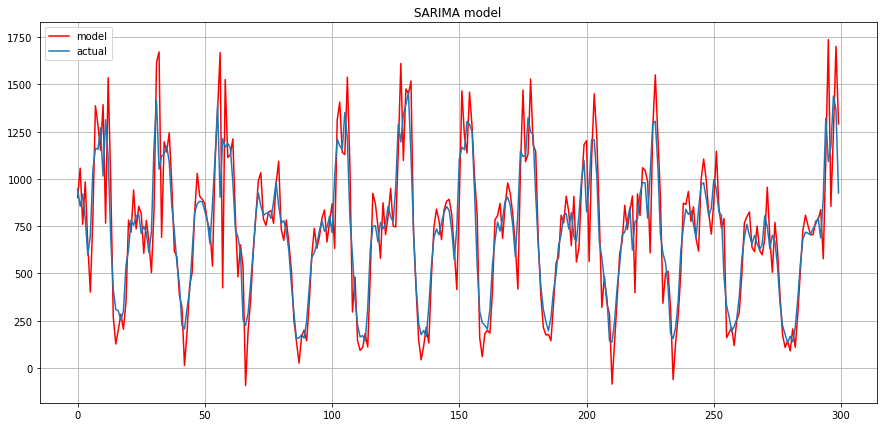

In [462]:
forecast = best_model.predict()
forecast = r.arima_model.append(forecast).values[-300:]
actual = r.n.values[-300:]
plt.figure(figsize=(15, 7))
plt.plot(forecast, color='r', label="model")
plt.title("SARIMA model")
plt.plot(actual, label="actual")
plt.legend()
plt.grid(True)

In [177]:
len(best_model.fittedvalues)

18288

In [524]:
r["arima_model"] = best_model.fittedvalues

In [525]:
o=r.n[17288:]-best_model.fittedvalues

In [527]:
o.median()

10.500848984231027

Вывод: Средневзвешенная ошибка моей модели SARIMAX 10.5. Модель неплохо описывает данные. Остатки не автокоррелированны.